#**Random Forest**

In [25]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [27]:
#%%R
#install.packages("dplyr") 
#install.packages("ggplot2") 
#install.packages("caret") 
#install.packages("e1071") 
#install.packages("cowplot") 
#install.packages("matrix")
#install.packages("magrittr")
#install.packages("glmnet", dependencies=TRUE)
#install.packages("groupdata2")
#install.packages("randomForest")
#install.packages("caTools")
#tar("libraryrf.tar.gz", "/usr/local/lib/R/site-library")

In [28]:
#%cp libraryrf.tar.gz gdrive/MyDrive

In [29]:
%cp gdrive/MyDrive/libraryrf.tar.gz .

In [30]:
!tar xf libraryrf.tar.gz

tar: Removing leading `/' from member names


In [31]:
%%R
.libPaths('usr/local/lib/R/site-library/')

In [32]:
%%R
library(data.table) 
library(ggplot2)  
library(caret)        
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)
library(groupdata2)
library(class)
library(randomForest)
library(caTools)

In [33]:
%%R
data = read.csv('/content/gdrive/MyDrive/DS_CP/diabetes.csv')

In [34]:
%%R
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [35]:
%%R
dim(data)

[1] 768   9


In [36]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [37]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
500 268 


In [38]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:5

In [39]:
%%R
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...


In [40]:
%%R
set.seed(222)
ind <- sample.split(data, SplitRatio = 0.8)
train <- data[ind,]
test <- data[-ind,]

In [41]:
%%R
table(train$Outcome)


  0   1 
379 218 


In [42]:
%%R
train<-upsample(
  train,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [43]:
%%R
table(train$Outcome)


  0   1 
379 379 


In [44]:
%%R
set.seed(122)
rf <- randomForest(Outcome~., data = train,
                   ntree = 550, 
                   mtry = 8,
                   importance = TRUE,
                   proximity = TRUE)

In [45]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 379   0
         1   0 379
                                     
               Accuracy : 1          
                 95% CI : (0.9951, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : 0          
                                     


In [46]:
%%R
p2 <- predict(rf,test)
confusionMatrix(p2,test$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 479  13
         1  21 254
                                          
               Accuracy : 0.9557          
                 95% CI : (0.9386, 0.9691)
    No Information Rate : 0.6519          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.903           
                                          
 Mcnemar's Test P-Value : 0.2299          
                                          
            Sensitivity : 0.9580          
            Specificity : 0.9513          
         Pos Pred Value : 0.9736          
         Neg Pred Value : 0.9236          
             Prevalence : 0.6519          
         Detection Rate : 0.6245          
   Detection Prevalence : 0.6415          
      Balanced Accuracy : 0.9547          
                                          
       'Positive' Class : 0               
                              

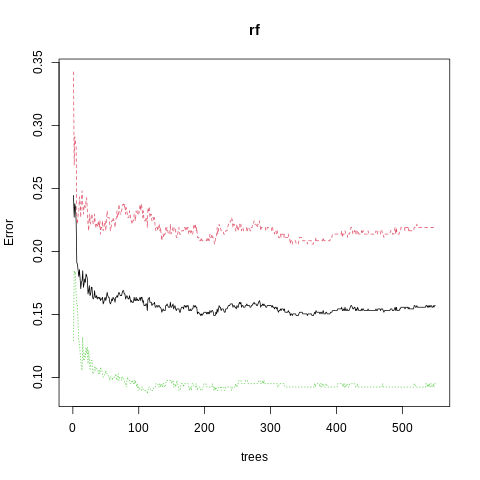

In [47]:
%%R
plot(rf)

mtry = 2  OOB error = 14.78% 
Searching left ...
mtry = 1 	OOB error = 16.23% 
-0.09821429 3 
Searching right ...
mtry = 8 	OOB error = 16.23% 
-0.09821429 3 


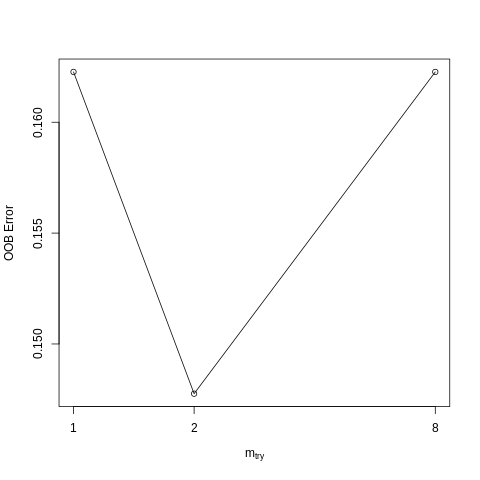

In [48]:
%%R
t <- tuneRF(train[,-9], train[,9],
            stepFactor = 6,
            plot = TRUE,
            ntreeTry = 550,
            trace = TRUE,
            improve = 3)